# 1. Data Observation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = "E:/Hackathon/CabFarePrediction/"

In [7]:
train = pd.read_csv(path+'TRAIN.CSV')
test = pd.read_csv(path + 'TEST.CSV')

In [8]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [9]:
train.shape, test.shape

((100000, 9), (25000, 8))

In [10]:
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [11]:
train['cab_type'].value_counts()

Black           8744
Black SUV       8712
UberXL          8676
UberX           8588
WAV             8585
UberPool        8558
Lyft XL         8115
Lux Black XL    8065
Lux             8060
Shared          7998
Lyft            7957
Lux Black       7942
Name: cab_type, dtype: int64

In [12]:
train['cab_provider'].value_counts()

Uber    51863
Lyft    48137
Name: cab_provider, dtype: int64

In [13]:
train['distance'].max(), train['distance'].min()

(7.5, 0.02)

In [14]:
train['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

The private rideshare service says it uses an algorithm based on classic supply and demand: When demand for cars goes up, prices go up to decrease demand and to encourage more drivers to get on the road, increasing supply.

` Price = Normal Price * Surge_multiplier `

# Exploratory Data Analaysis

## Missing values

In [15]:
train.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
fare                0
dtype: int64

In [16]:
test.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
dtype: int64

## Univariate Analysis (Target)

In [17]:
train['fare']

0        34.0
1        18.5
2        19.5
3        10.5
4        32.0
         ... 
99995    12.0
99996    26.0
99997    16.0
99998     7.0
99999     7.0
Name: fare, Length: 100000, dtype: float64

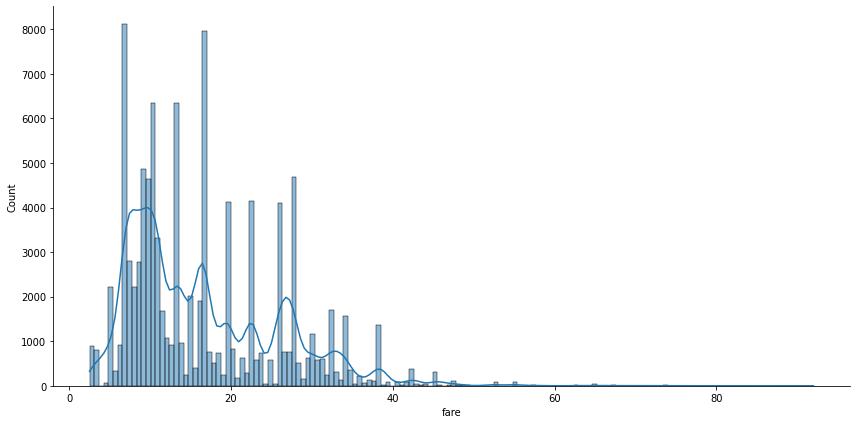

In [18]:
sns.displot(x = 'fare', data = train, aspect = 2, height = 6, kde = True);

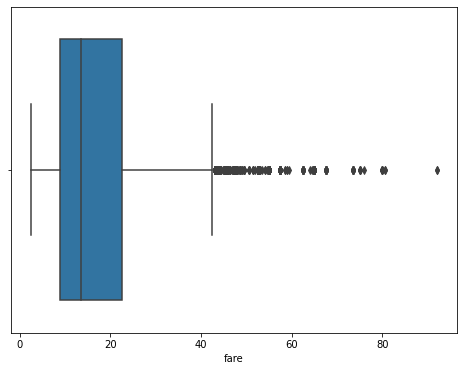

In [19]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = train);

In [20]:
# Skew and kurt

print("Skewness: %f" % train['fare'].skew())
print("Kurtosis: %f" % train['fare'].kurt())

Skewness: 1.039652
Kurtosis: 1.149118


In [21]:
xtrain = train.copy()
xtest = test.copy()

In [22]:
# Let's apply Log(1+x) on Fare

xtrain['fare'] = np.log1p(xtrain['fare'])

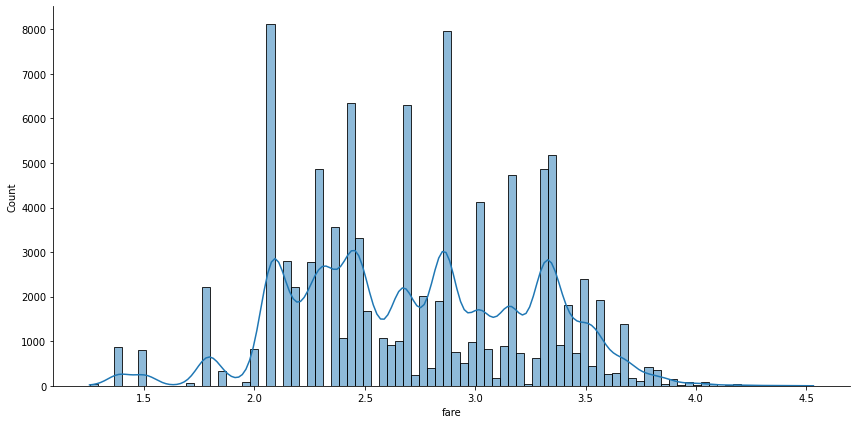

In [23]:
sns.displot(x = 'fare', data = xtrain, aspect = 2, height = 6, kde = True);

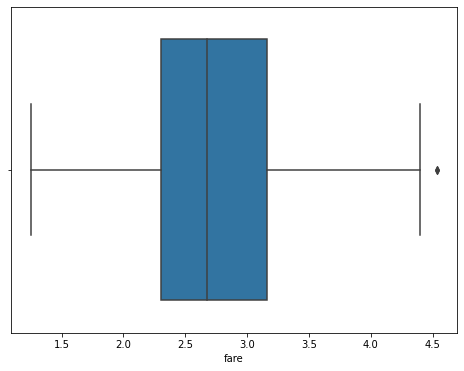

In [24]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = xtrain);

## Independent Variable Analysis

In [25]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             100000 non-null  int64  
 1   time_stamp        100000 non-null  int64  
 2   cab_provider      100000 non-null  object 
 3   source            100000 non-null  object 
 4   destination       100000 non-null  object 
 5   distance          100000 non-null  float64
 6   surge_multiplier  100000 non-null  float64
 7   cab_type          100000 non-null  object 
 8   fare              100000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


### Cab Provider

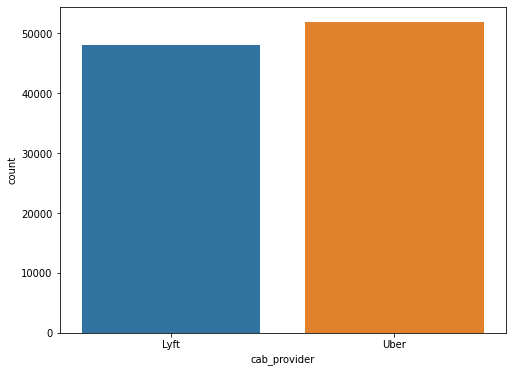

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'cab_provider', data = train);

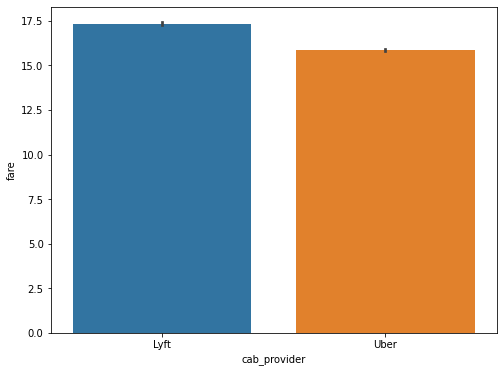

In [27]:
# The cab provider with "Fare"

plt.figure(figsize = (8,6))
sns.barplot(x = 'cab_provider', y = 'fare', data = train);

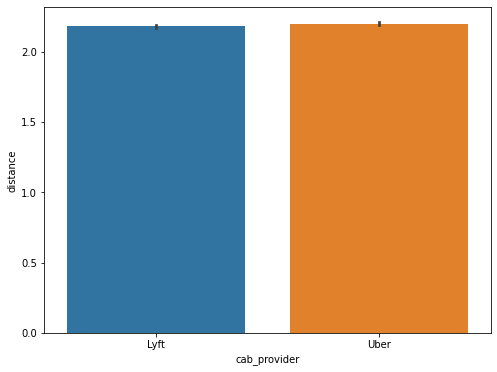

In [28]:
# The cab provider with "distance"

plt.figure(figsize = (8,6))
sns.barplot(x = 'cab_provider', y = 'distance', data = train);

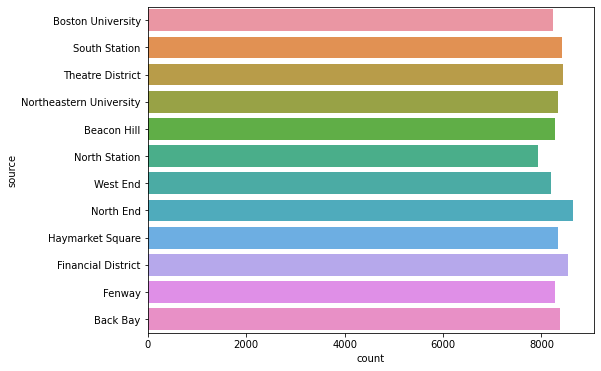

In [29]:
#

plt.figure(figsize = (8,6))
sns.countplot(y = 'source', data = train);

### Fare vs Distance

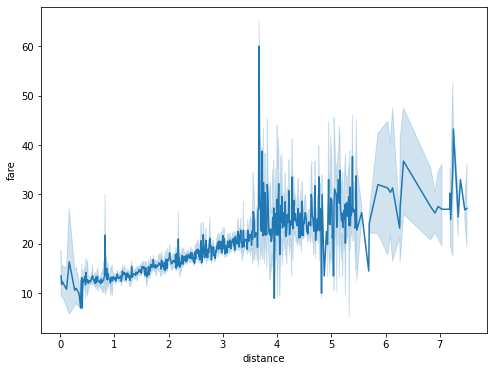

In [30]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'distance', y = 'fare', data = train);

### Surge multiplier

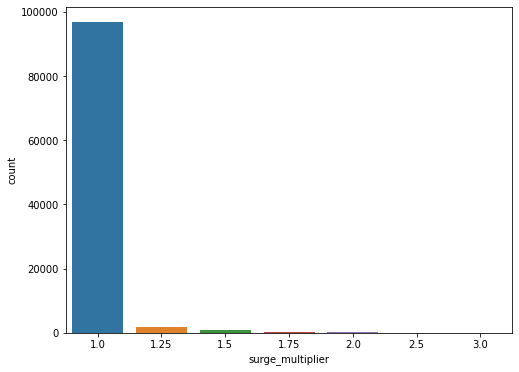

In [31]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'surge_multiplier', data = train);

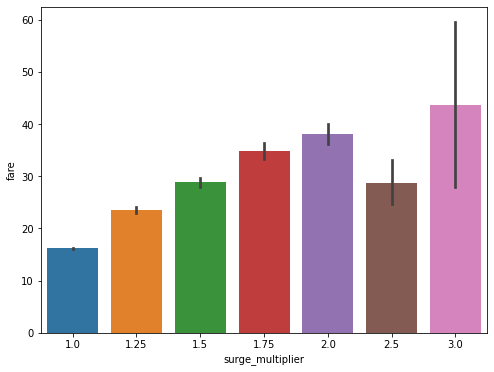

In [32]:
# Surge Multiplier and Price

plt.figure(figsize = (8,6))
sns.barplot(x = 'surge_multiplier', y = 'fare', data = train);

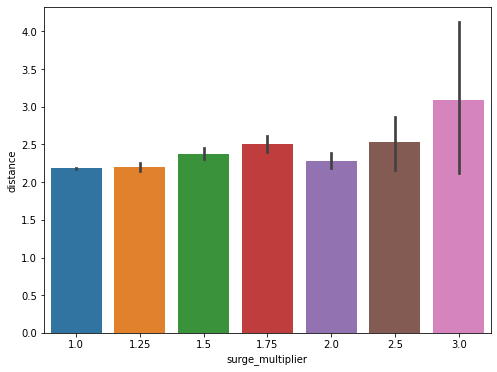

In [33]:
# Surge Multiplier and Distance

plt.figure(figsize = (8,6))
sns.barplot(x = 'surge_multiplier', y = 'distance', data = train);

### Cab Type

https://www.uber.com/gb/en/ride/ride-options/

https://www.lyft.com/rider

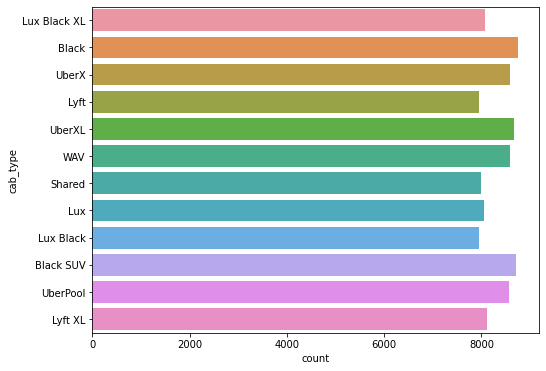

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(y = 'cab_type', data = train);

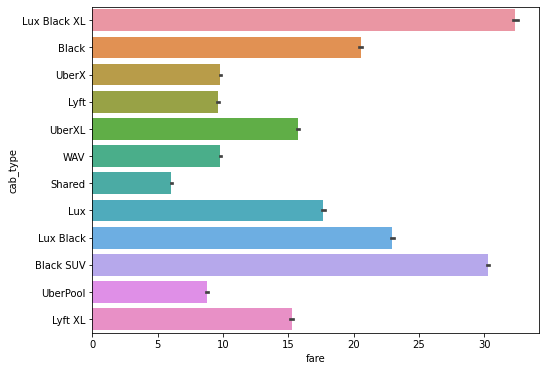

In [35]:
# Cab Type and Price

plt.figure(figsize = (8,6))
sns.barplot(y = 'cab_type', x = 'fare', data = train);

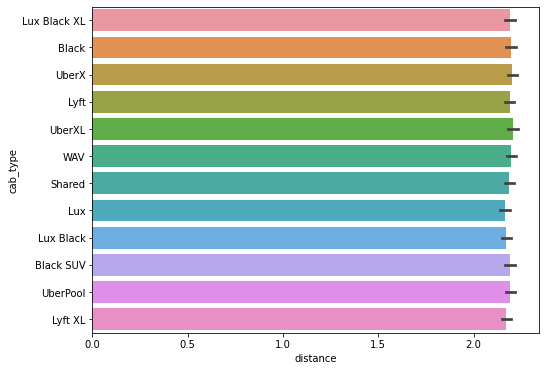

In [36]:
# Cab Type and Distance

plt.figure(figsize = (8,6))
sns.barplot(y = 'cab_type', x = 'distance', data = train);

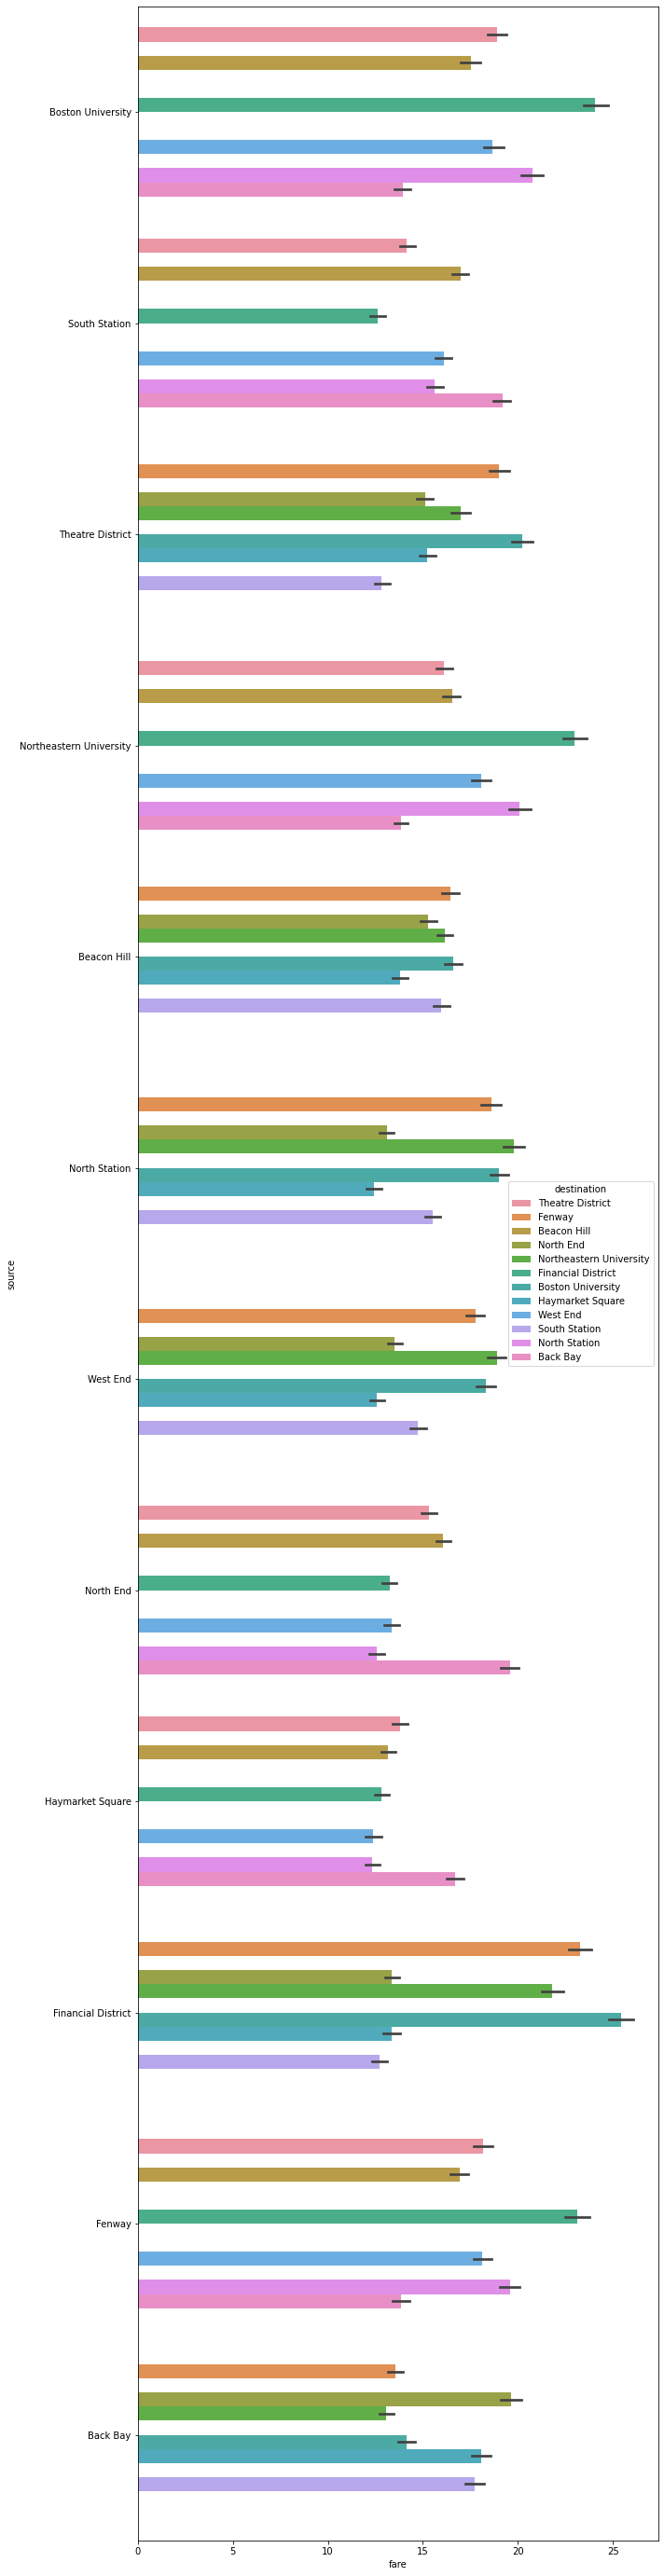

In [37]:
#

plt.figure(figsize = (10,50))
sns.barplot(x = 'fare', y = 'source', hue = 'destination', data = train);

### Extract Day Date and Time from TimeStamp

In [38]:
xtrain['date_time'] = pd.to_datetime(xtrain['time_stamp'] / 1000, unit = 's')

In [39]:
xtrain['hour'] = xtrain['date_time'].dt.hour

In [40]:
xtest['date_time'] = pd.to_datetime(xtest['time_stamp'] / 1000, unit = 's')

In [41]:
xtest['hour'] = xtest['date_time'].dt.hour

## Corrleation

Let's encode all the features and check the correlation

In [42]:
labeldf = xtrain.copy()

In [43]:
from sklearn import preprocessing

In [44]:
label_encoder = preprocessing.LabelEncoder()

In [45]:
for i in labeldf:
    if labeldf[i].dtypes == 'object':
        labeldf[i] = label_encoder.fit_transform(labeldf[i])

In [46]:
labeldf.head(4)

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date_time,hour
0,0,1543203646318,0,2,10,3.03,1.0,4,3.555348,2018-11-26 03:40:46.318000128,3
1,1,1543203646319,1,9,10,1.30,1.0,0,2.970414,2018-11-26 03:40:46.319000064,3
2,2,1543203646320,1,10,3,2.71,1.0,9,3.020425,2018-11-26 03:40:46.320000000,3
3,3,1543203646320,0,8,1,2.43,1.0,5,2.442347,2018-11-26 03:40:46.320000000,3


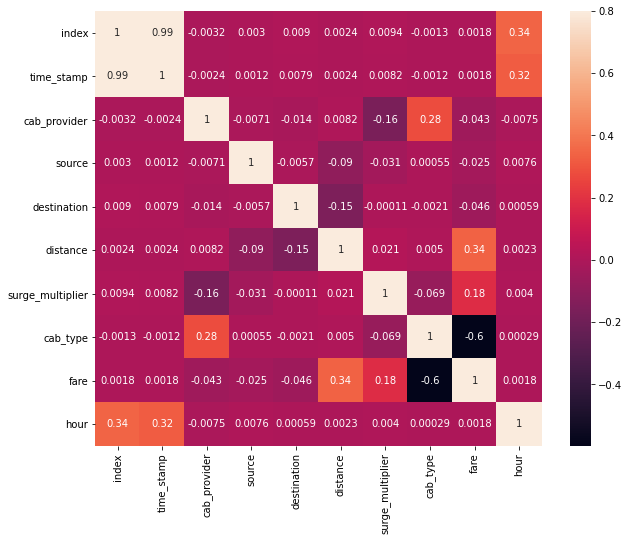

In [47]:
corrmat = labeldf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [48]:
xtrain.drop('index', inplace = True, axis =1)
xtrain.drop('time_stamp', inplace = True, axis = 1)
xtrain.drop('date_time', inplace = True, axis = 1)

In [49]:
xtest.drop('index', inplace = True, axis =1)
xtest.drop('time_stamp', inplace = True, axis = 1)
xtest.drop('date_time', inplace = True, axis = 1)

## Fix skewed Features

In [50]:
# Fetch all numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in xtrain.columns:
    if xtrain[i].dtype in numeric_dtypes:
        numeric.append(i)

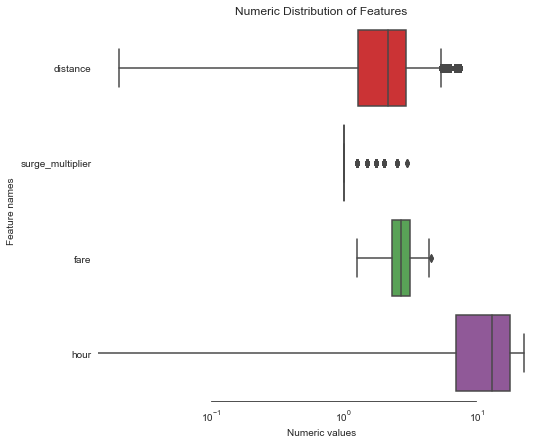

In [51]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

### Balancing Dataset

In [52]:
# surge_multiplier

xtrain['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [53]:
xfilter = xtrain[xtrain['surge_multiplier'] == 1.00][:2500]

In [54]:
xtrain = xtrain[xtrain['surge_multiplier'] != 1.00]

In [55]:
xtrain['surge_multiplier'].value_counts()

1.25    1715
1.50     764
1.75     403
2.00     337
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [56]:
xtrain = pd.concat([xtrain, xfilter])

In [57]:
xtrain['surge_multiplier'].value_counts()

1.00    2500
1.25    1715
1.50     764
1.75     403
2.00     337
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [58]:
xtrain = xtrain[xtrain['surge_multiplier'] != 3.00]
xtrain = xtrain[xtrain['surge_multiplier'] != 2.50]


In [59]:
xtrain['surge_multiplier'].value_counts()

1.00    2500
1.25    1715
1.50     764
1.75     403
2.00     337
Name: surge_multiplier, dtype: int64

In [60]:
xtrain.shape

(5719, 8)

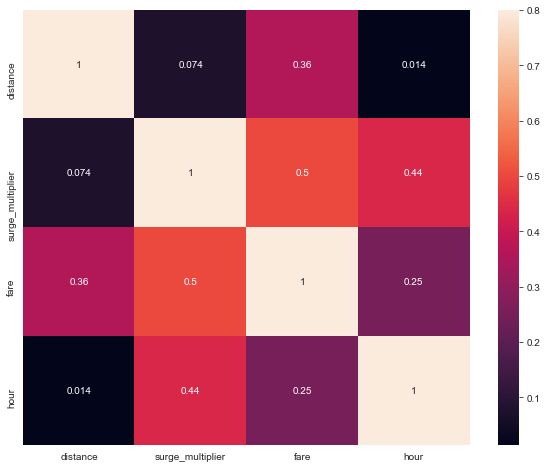

In [61]:
# Correlation


corrmat = xtrain.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [62]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [63]:
# Find skewed numerical features

skew_features = xtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 3 numerical features with Skew > 0.5 :


surge_multiplier    1.102396
hour                0.856791
distance            0.516078
fare               -0.118377
dtype: float64

In [64]:
xxtrain = xtrain.copy()

In [65]:
# Normalize skewed features

xxtrain["distance"] = boxcox1p(xxtrain["distance"], boxcox_normmax(xxtrain["distance"] + 1))
xxtrain["hour"] = boxcox1p(xxtrain["hour"], boxcox_normmax(xxtrain["hour"] + 1))

xtest['distance'] = boxcox1p(xtest['distance'], boxcox_normmax(xtest['distance'] + 1))
xtest['hour'] = boxcox1p(xtest['hour'], boxcox_normmax(xtest['hour'] + 1))

In [66]:
# Find skewed numerical features

skew_features = xxtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 1 numerical features with Skew > 0.5 :


surge_multiplier    1.102396
distance            0.014082
hour               -0.006454
fare               -0.118377
dtype: float64

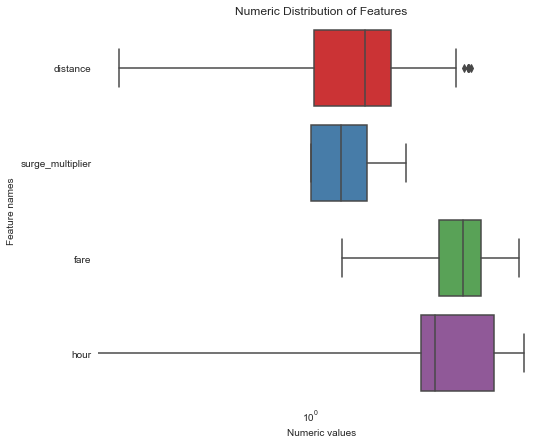

In [67]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xxtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

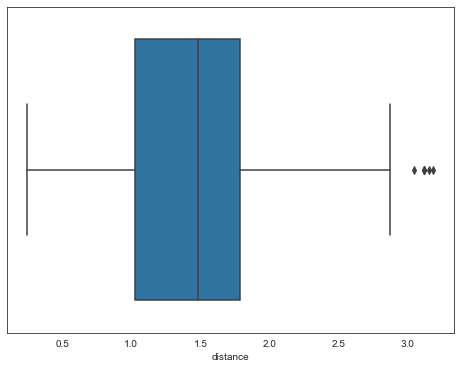

In [68]:
# Distance

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = xxtrain);

## Encode Categorical Features

In [69]:
xxtrain = pd.get_dummies(xxtrain).reset_index(drop = True)
xtest = pd.get_dummies(xtest).reset_index(drop = True)

In [70]:
xxtrain

,distance,surge_multiplier,fare,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,2.323822,1.75,3.881564,1.635315,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2.323822,1.75,4.151040,1.635315,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1.530202,1.25,3.020425,1.635315,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.168230,1.75,3.295837,1.635315,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.662334,1.25,3.157000,1.951272,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,1.998818,1.00,3.157000,2.672792,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5715,1.679421,1.00,3.449988,2.672792,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5716,1.679421,1.00,3.178054,2.672792,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5717,1.493700,1.00,2.708050,2.672792,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
xtest

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.444188,1.0,0.000000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.916622,1.0,0.000000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.542412,1.0,6109.768034,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Models , Evaluation Metrics and Tuning

## Training and test sets

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [73]:
extrain = xxtrain.copy()
extrain = extrain.sample(frac = 1)
extrain = extrain.iloc[:25000]

In [74]:
X = extrain.drop('fare', axis = 1)
y = extrain['fare']

# test data

tX = xtest.copy()

In [75]:
scaler = StandardScaler()

**Scaling Training Data**

In [76]:
X

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
4621,0.829369,1.00,2.459737,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2113,1.525670,1.25,3.505551,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
662,1.512021,1.25,4.425609,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,0.816843,1.00,2.221856,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4234,1.241307,1.00,2.221856,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,1.623447,1.00,2.221856,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4111,1.447262,1.00,2.221856,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5100,1.346612,1.00,2.459737,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5277,1.399881,1.00,2.459737,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
X[['distance','hour']] = scaler.fit_transform(X[['distance','hour']])

In [78]:
X

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
4621,-1.129223,1.00,-0.385158,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2113,0.246909,1.25,0.620223,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
662,0.219935,1.25,1.504710,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,-1.153979,1.00,-0.613842,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4234,-0.315091,1.00,-0.613842,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,0.440151,1.00,-0.613842,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4111,0.091949,1.00,-0.613842,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5100,-0.106970,1.00,-0.385158,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5277,-0.001693,1.00,-0.385158,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
scaler = StandardScaler()

**Scaling Testing Data**

In [80]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.444188,1.0,0.000000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.916622,1.0,0.000000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.481668,1.0,0.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.570573,1.0,6109.768034,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.542412,1.0,6109.768034,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
tX[['distance','hour']] = scaler.fit_transform(tX[['distance','hour']])

In [83]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,-1.723543,1.0,-1.765259,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-1.723543,1.0,-1.765259,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.919424,1.0,-1.765259,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.694521,1.0,-1.765259,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.723543,1.0,-1.765259,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.852610,1.0,2.409603,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,0.852610,1.0,2.409603,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,0.852610,1.0,2.409603,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0.785986,1.0,2.409603,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Error function to compute error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

NameError: name 'X' is not defined

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Setup cross validation and define error metrics

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [86]:
# Setup cross validation folds

kf = KFold(n_splits = 11, random_state = 42, shuffle = True)

### Setup models

In [108]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
#from mlxtend.regressor import StackingCVRegressor
#import lightgbm as lgb
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#### Linear Regression

In [495]:
model = LinearRegression()

In [496]:
model.fit(X_train, y_train)

LinearRegression()

In [497]:
print("Test R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

Test R^2 Score: 0.96210


#### Light GBM

In [498]:
# Light Gradient Boosting Regressor

lightgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

gbm = GridSearchCV(lightgbm, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 5,
                   verbose = True)


In [499]:
gbm.fit(X_train, y_train)

Fitting 2 folds for each of 2916 candidates, totalling 5832 fits


GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [400, 700, 1000],
                         'num_leaves': [50, 100, 200],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]},
             verbose=True)

In [500]:
print(gbm.best_score_)

0.9589831917546432


In [501]:
print(gbm.best_params_)

{'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9, 'subsample_freq': 20}


#### XGBoost

In [520]:
from xgboost import XGBRegressor

In [521]:
# XGBoost Regressor
xgboost = XGBRegressor()

param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb = GridSearchCV(xgboost, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 5, 
                   verbose = True)

In [522]:
xgb.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[16:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [523]:
print(xgb.best_score_)

0.9709217570814643


In [524]:
print(xgb.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [525]:
params = {'colsample_bytree': 0.7, 
             'learning_rate': 0.03, 
             'max_depth': 6, 
             'min_child_weight': 4, 
             'n_estimators': 500, 
             'nthread': 4, 
             'objective': 
             'reg:linear', 
             'silent': 1, 
             'subsample': 0.7}

xgboost = XGBRegressor(**params)

In [526]:
xgboost.fit(X_train, y_train)

[16:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [527]:
xgb_pred = xgboost.predict(X_test)

In [528]:
r2_score(y_test, xgb_pred)

0.9723611427457733

In [529]:
print(cross_val_score(xgboost, X_train, y_train, cv = 3))

[16:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost cor

### Ridge Regressor

In [517]:
# Ridge Regressor
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

ridge_reg = Ridge()

ridge = GridSearchCV(ridge_reg, 
                     param_grid = dict(alpha= alphas), 
                     cv = 2, 
                     n_jobs = 5, 
                     verbose = True)

In [518]:
ridge.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=Ridge(), n_jobs=5,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             verbose=True)

In [519]:
print(ridge.best_score_)

0.9628680056443626


### Support Vector Regressor

In [812]:
# SVR

param_grid={
    
        'C': [0.1, 1, 100, 1000],
        
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
        
        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        
    }
    

svr = SVR(kernel = 'rbf')

svr_gcv = GridSearchCV(svr,
                      param_grid,
                      cv = 2, 
                      scoring = 'neg_mean_squared_error',
                      verbose = 0, 
                      n_jobs = 5)

In [ ]:
svr_gcv.fit(X_train, y_train)

In [ ]:
print(svr_gcv.best_score_)

### Gradient Boosting Regressor

In [502]:
# GBR

params = {
    'loss': ['ls', 'lad','huber','quantile'],
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [3,5,6]
} 

gbr_model = GradientBoostingRegressor()

gbr = GridSearchCV(gbr_model,
                  params,
                  cv = 2,
                  verbose = True,
                  n_jobs = 5)


In [503]:
gbr.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 5, 6]},
             verbose=True)

In [504]:
print(gbr.best_score_)

0.9683345400510917


In [505]:
print(gbr.best_params_)

{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 3}


In [506]:
params = {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 3}

gbr_cv = GradientBoostingRegressor(**params)

gbr_cv.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, loss='huber')

In [507]:
gbr_pred = gbr_cv.predict(X_test)

In [508]:
r2_score(y_test, gbr_pred)

0.9679917284334992

In [509]:
print(cross_val_score(gbr_cv, X_train, y_train, cv = 3))

[0.96999934 0.96621598 0.97073648]


In [268]:
print("R2 Score:", r2_score(y_test, gbr_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,gbr_pred)))

R2 Score: 0.9704370713710249
Mean Squarred Error: 0.009364988023557952
RMSE: 0.09677286822016774
Mean Absolute Error : 0.06752220095216618


**GBR with balanced dataset**

- R2 Score: 0.9704435818146127
- Mean Squarred Error: 0.009362925635660182
- RMSE: 0.09676221181670137
- Mean Absolute Error : 0.06750763991137315

In [251]:
X_test

,distance,surge_multiplier,day,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
1081,-1.770419,0.710570,1.047777,-1.192691,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3801,-0.927076,-0.972465,-0.926244,-0.733151,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
363,-0.054040,-0.130947,-0.926244,0.492287,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4483,-1.146167,-0.972465,-0.926244,-0.579971,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4486,1.839855,-0.972465,-0.926244,-0.579971,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-0.719310,-0.130947,-0.926244,-0.120432,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
84,-0.564661,0.710570,-0.926244,-0.579971,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3074,-0.394609,-0.130947,1.047777,1.870906,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3573,-0.102500,-0.972465,-0.926244,-0.886331,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## RandomForest

In [233]:
from sklearn.metrics import mean_squared_error
import math


print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))

RMSE: 0.09676221181670137


In [221]:
### RandomForestRegressor

# Random Forest Regressor

para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "min_samples_split":[2,4,8],
            "bootstrap"    : [True, False]
        }

rf = RandomForestRegressor()

rf_cv = GridSearchCV(rf,
                    para_grids,
                    n_jobs = 5,
                    cv = 2)

In [222]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100]})

In [223]:
print(rf_cv.best_score_)

0.9674121854122588


### Neural Network

In [90]:
X_train.shape

(4575, 41)

In [137]:
!pip install wandb

  Using cached promise-2.3.tar.gz (19 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=7b8f64c4479fe3ddefa801e7889a0e783a8cf4797bae6f829bfa9e9e3b9165dd
  Stored in directory: c:\users\basto\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6488 sha256=5730a752868eb7980aebc762995a65a20bbab0b7f884db7f78e530c61a6dc8cb
  Stored in directory: c:\users\basto\appdata\local\pip\cache\wheels\9f\69\d1\50b39b308a87998eaf5c1d9095e5a5bd2ad98501e2b7936d36
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8784 sha256=74571007aabfd2406378a1e4c470b13a16869e82dd6f0602d9d05ad91f2341a6
  Stored in directory: c:\users\basto\appdata\local\pip\cache\wheels\4c\8e\7e\72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built promise subprocess32 pathtools


You should consider upgrading via the 'c:\users\basto\anaconda3\envs\tfgpu\python.exe -m pip install --upgrade pip' command.


In [138]:

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from wandb.keras import WandbCallback

In [139]:
# Initialising the NN

model = Sequential()

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])


In [142]:
model = Sequential()
model.add(Dense(50, input_dim=378, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0)

ValueError: in user code:

    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_16 is incompatible with the layer: expected axis -1 of input shape to have value 378 but received input with shape (None, 41)


In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.0920322863060501
0.1257858337706249


In [132]:
r2_score(y_test, nn_pred)

0.9636443601597512

In [119]:
print(cross_val_score(model, X_train, y_train, cv = 3))

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001A4E3F15640> does not.

In [268]:
print("R2 Score:", r2_score(y_test, nn_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, nn_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, nn_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,nn_pred)))

R2 Score: 0.9704370713710249
Mean Squarred Error: 0.009364988023557952
RMSE: 0.09677286822016774
Mean Absolute Error : 0.06752220095216618


In [2]:
# get a list of base models

def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    mode

SyntaxError: unexpected character after line continuation character (<ipython-input-2-74646f184a5d>, line 4)

In [189]:
## Submit predictions

submission = pd.read_csv('sample_submission.csv')

In [190]:
submission

,index,fare
0,0,11.0
1,1,26.0
2,2,18.5
3,3,11.5
4,4,9.0
5,5,10.5
6,6,7.0
7,7,7.0
8,8,26.0
9,9,5.0


In [530]:
output = pd.DataFrame(columns = ['index','fare'])

In [531]:
output['index'] = test.index

In [532]:
output['index'] = output['index'].astype('str')

In [533]:
output['fare'] = np.floor(np.expm1(xgboost.predict(tX)))

In [534]:
output

,index,fare
0,0,11.0
1,1,26.0
2,2,14.0
3,3,12.0
4,4,10.0
...,...,...
24995,24995,10.0
24996,24996,11.0
24997,24997,32.0
24998,24998,6.0


In [535]:
output.to_csv('output5.csv', index = False)